This script generates Democratic and Republican primary boosted tree models, tested on both the 2018 senate and governor's primaries.

In [411]:
#Import packages
import pandas as pd
import re
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
pd.options.mode.chained_assignment = None 
import numpy as np
from sklearn import metrics
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

np.random.seed(5)

In [412]:
#Read in data and filter out test data
turnout_train_rep = pd.read_csv("turnout_train_rep.csv")
turnout_train_dem = pd.read_csv("turnout_train_dem.csv")


turnout_train_rep_use = turnout_train_rep[turnout_train_rep['Year'] != 2018]
turnout_train_dem_use = turnout_train_dem[turnout_train_dem['Year'] != 2018]





Training
R^2:  0.9519136748358896
Mean Absolute Error (MAE): 1.1443640912288553
Mean Squared Error (MSE): 2.952604148090517


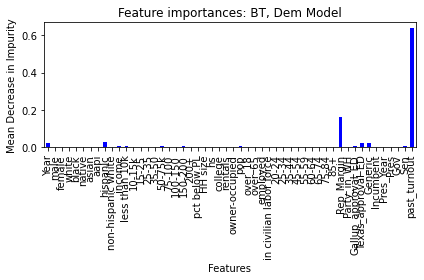

In [419]:

#Boosted Trees: Dem model

turnout_train_dem_mod = turnout_train_dem_use

#Specify features and outcome
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)
model_outcome = turnout_train_dem_mod['Turnout']

#Create model
bt = GradientBoostingRegressor()
bt.fit(model_feats, model_outcome);

#Make predictions
pred = bt.predict(model_feats)

#Print Score
print("Training")

print("R^2: ",bt.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


#Show Importances
importances = bt.feature_importances_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(color = 'blue')
plt.title("Feature importances: BT, Dem Model")
plt.ylabel("Mean Decrease in Impurity")
plt.xlabel("Features")
fig.tight_layout()


In [414]:
np.random.seed(5)
#Test on 2018 Senate race
turnout_train_dem_mod = turnout_train_dem

#Specify election
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2018_Dem_Sen']


#Specify features and outcome
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff', ], axis = 1)
model_outcome = turnout_train_dem_mod['Turnout']

#make predictions
pred = bt.predict(model_feats)

#Print Score
print("Testing: Dem Sen 2018")

print("R^2: ",bt.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



Testing: Dem Sen 2018
R^2:  0.8580744048980077
Mean Absolute Error (MAE): 1.4278241998191277
Mean Squared Error (MSE): 5.979535751485975


In [415]:
np.random.seed(5)
#Test on 2018 Gov race
turnout_train_dem_mod = turnout_train_dem
#Specify election
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2018_Dem_Gov']
#Specify features and outcome
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)
model_outcome = turnout_train_dem_mod['Turnout']

#make predictions
pred = bt.predict(model_feats)

#Print Score
print("Testing: Dem Gov 2018")

print("R^2: ",bt.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



Testing: Dem Gov 2018
R^2:  0.8154043225520422
Mean Absolute Error (MAE): 1.5950713723810257
Mean Squared Error (MSE): 6.611218866261477


Training
R^2:  0.9311607373095993
Mean Absolute Error (MAE): 1.8032980723050238
Mean Squared Error (MSE): 5.8471974634714154


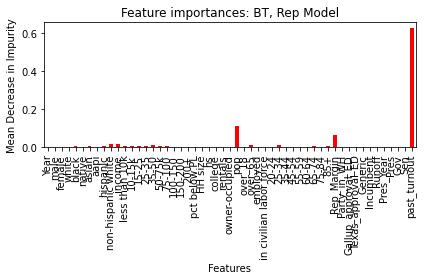

In [416]:
np.random.seed(5)
#Boosted Trees: Rep model

turnout_train_rep_mod = turnout_train_rep_use


#Specify features and outcome
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type'], axis = 1)
model_outcome = turnout_train_rep_mod['Turnout']

#Create model
bt = GradientBoostingRegressor()
bt.fit(model_feats, model_outcome);

#Make predictions
pred = bt.predict(model_feats)

#Print Score
print("Training")

print("R^2: ",bt.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


#Show Importances
importances = bt.feature_importances_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(color = 'red')
plt.title("Feature importances: BT, Rep Model")
plt.ylabel("Mean Decrease in Impurity")
plt.xlabel("Features")
fig.tight_layout()


In [417]:
np.random.seed(5)
#Test on 2018 Senate race
turnout_train_rep_mod = turnout_train_rep
#Specify election
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Election'] == '2018_Rep_Sen']
#Specify features and outcome
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type'], axis = 1)
model_outcome = turnout_train_rep_mod['Turnout']

#make predictions
pred = bt.predict(model_feats)

#Print Score
print("Testing: Rep Sen 2018")

print("R^2: ",bt.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



Testing: Rep Sen 2018
R^2:  0.6722413218493382
Mean Absolute Error (MAE): 3.7603108862569816
Mean Squared Error (MSE): 30.082775311495862


In [418]:
np.random.seed(5)
#Test on 2018 Gov race
turnout_train_rep_mod = turnout_train_rep
#Specify election
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Election'] == '2018_Rep_Gov']
#Specify features and outcome
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type'], axis = 1)
model_outcome = turnout_train_rep_mod['Turnout']

#make predictions
pred = bt.predict(model_feats)

#Print Score
print("Testing: Rep Gov 2018")

print("R^2: ",bt.score(model_feats, model_outcome))

#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



Testing: Rep Gov 2018
R^2:  0.6705417774074192
Mean Absolute Error (MAE): 3.758146852193988
Mean Squared Error (MSE): 30.303354970897814
